# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [34]:
def StarFormationRate(lum, ltype, TIR=0):
    """
    Get the star formation rate given the star formation rate given the luminosity of the galaxy
    following Kennicutt & Evans 2012 ARA&A Equation 12.
    
    :param lum: luminoosity of the galaxy in erg/s
    :param ltype: string that lists the wavelength; FUV, NUV, TIR, Halpha
    :param tir: total infrared luminosity 
    :return: Log of the SFR (Msun/year)
    """
    if ltype == 'FUV':
        # Calibration from L to SRF from Table 1 (K&E 2012)
        logCx = 43.35 
        # Correction for dust absorption from Table 2 (K&E 2012)
        TIRc = 0.46 
    elif ltype == 'NUV':
        logCx = 43.17
        TIRc = 0.27
    elif ltype == 'Halpha':
        logCx = 41.27
        TIRc = 0.0024
    elif ltype == 'TIR':
        logCx = 43.41
        TIRc = 0
    else:
        print('Missing Wavelength: FUV, NUV, TIR, Halpha')
    
    # Correct the lumunisity for dust
    lnew = lum + TIRc * TIR
    return np.log10(lnew) - logCx

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [7]:
Lsun2Ergs = const.L_sun.to('erg/s').value

In [8]:
#  WLM Dwarf Irregular Galaxy
# From Lee et al. 2009 WLM Galaxy log(SRF) derived from UV is -2.21
# From NEDL WLM NUV Luminosity (Galex) 1.7e7 Lsun
# From NED: WLM FIR Luminosity (IRAC) 2.48e06  Lsun

NUV_WLM = 1.71e7 * Lsun2Ergs
TIR_WLM = 2.48e6 * Lsun2Ergs

StarFormationRate(NUV_WLM, 'NUV', TIR_WLM)

-2.3373504191027266

In [11]:
#  N24 Sc galaxy
# From Lee et al. 2009 NGC 24 Galaxy log(SRF) derived from UV is -0.7
# From NEDL NGC 24 NUV Luminosity (Galex) 2.96E+08 Lsun
# From NED: NGC 24 FIR Luminosity (MIPS) 3.09E+08  Lsun
# From NED: NGC 24 NIR Luminosity (2MASS) 8.34E+08  Lsun

NUV_N24 = 2.96e8 * Lsun2Ergs
TIR_N24 = 3.09e8 * Lsun2Ergs + 8.34e8*Lsun2Ergs
StarFormationRate(NUV_N24, 'NUV', TIR_N24)

-0.8055527449424105

# Part B Star formation main sequence

Write a function that returns the average SFR of a galaxy at a given redshift. 

What is the average SFR of a MW mass galaxy today? at z=1?

Plot the SFR main sequence for a few different redshifts.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

In [19]:
def SFRMainSequence(Mstar, z):
    """
    Average SFR of a galaxy as a function of mass, and redshift
    :param Mstar: stellar mass of the galaxy in Msun
    :param z: redshift
    :return: log(SFR (Msun/year))
    """
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    logSRF = alpha*(np.log10(Mstar) - 10.5) + beta
    return logSRF
    

In [20]:
# MW at z=0; the actual starformation of MW is only 1 Msun / year
10**SFRMainSequence(6e10, 0)

3.7558295562247412

In [22]:
# MW at z = 1,4
10**SFRMainSequence(6e10, 1), 10**SFRMainSequence(6e10, 4)

(30.799680595160783, 89.13889068294495)

In [27]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)

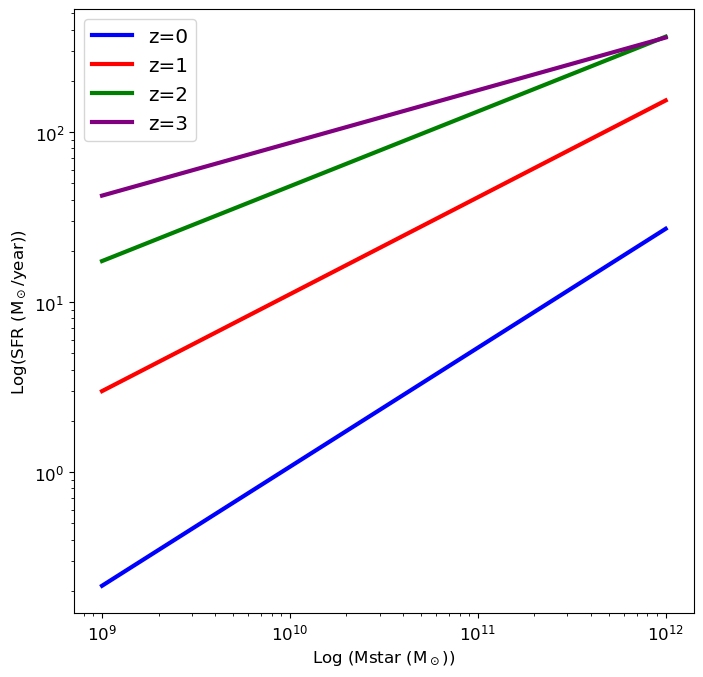

In [32]:

fig = plt.figure(figsize=(8,8), dpi=100)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass, 10**SFRMainSequence(Mass, 0), color='blue', lw=3, label='z=0')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 1), color='red', lw=3, label='z=1')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 2), color='green', lw=3, label='z=2')
plt.loglog(Mass, 10**SFRMainSequence(Mass, 3), color='purple', lw=3, label='z=3')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

What are the star formation rates for :

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [36]:
# normal galaxies 

TIR_normal = 1e10 * Lsun2Ergs
10**StarFormationRate(TIR_normal, 'TIR')

1.4892648150381245

In [37]:
# LIRGs  
TIR_LIR = 1e11 * Lsun2Ergs
10**StarFormationRate(TIR_LIR, 'TIR')

14.892648150381245

In [38]:
# ULIRGs
TIR_ULIR = 1e12 * Lsun2Ergs
10**StarFormationRate(TIR_ULIR, 'TIR')

148.92648150381245

In [39]:
# HLIRGs
TIR_HLIR = 1e13 * Lsun2Ergs
10**StarFormationRate(TIR_HLIR, 'TIR')

1489.2648150381244

## 